In [1]:
import pandas as pd
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Emotion_classify_Data.csv")

In [3]:
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [6]:
df['map']= df.Emotion.map({'joy': 0,
                          'sadness': 1,
                          'anger': 2,
                          'fear': 3,
                          'love':4,
                          'surprise':5})

In [7]:
df

,Comment,Emotion,map
0,i seriously hate one subject to death but now ...,fear,3
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,3
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,3
...,...,...,...
5932,i begun to feel distressed for you,fear,3
5933,i left feeling annoyed and angry thinking that...,anger,2
5934,i were to ever get married i d have everything...,joy,0
5935,i feel reluctant in applying there because i w...,fear,3


# Creating a function to preprocess text using spacy¶

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    list =[]
    for token in nlp(text):
        if not token.is_space and not token.is_punct:
            list.append(token.lemma_)
    return ' '.join(list)


In [9]:
df['preprocessed_comment']= df.Comment.apply(preprocess)


In [10]:
df.head()

,Comment,Emotion,map,preprocessed_comment
0,i seriously hate one subject to death but now ...,fear,3,I seriously hate one subject to death but now ...
1,im so full of life i feel appalled,anger,2,I m so full of life I feel appalled
2,i sit here to write i start to dig out my feel...,fear,3,I sit here to write I start to dig out my feel...
3,ive been really angry with r and i feel like a...,joy,0,I ve be really angry with r and I feel like an...
4,i feel suspicious if there is no one outside l...,fear,3,I feel suspicious if there be no one outside l...


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_comment'],df['map'], test_size=0.33, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [14]:
pipe = Pipeline([('vectorizer Tfidf', TfidfVectorizer()), ('Random Forest', RandomForestClassifier( n_estimators=200,
    criterion='gini'))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer Tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier(n_estimators=200))])

In [15]:
y_pred = pipe.predict(X_test)
y_pred_test = pd.Series(y_pred)
y_pred_test.head()

0    2
1    0
2    3
3    2
4    2
dtype: int64

In [16]:
from sklearn.metrics import classification_report

print('Classification Report TEST DATA  :\n\n\n ', classification_report(y_test, y_pred_test))

Classification Report TEST DATA  :


                precision    recall  f1-score   support

           0       0.82      0.96      0.88       632
           2       0.93      0.84      0.88       659
           3       0.94      0.87      0.90       669

    accuracy                           0.89      1960
   macro avg       0.89      0.89      0.89      1960
weighted avg       0.90      0.89      0.89      1960



In [17]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn

In [18]:
cm_test  = confusion_matrix(y_test, y_pred_test)
cm_test

array([[605,  10,  17],
       [ 82, 554,  23],
       [ 51,  34, 584]], dtype=int64)

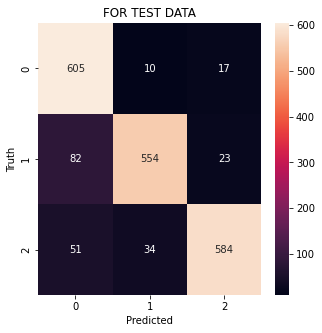

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

sn.heatmap(cm_test , annot= True, fmt="d")
plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.title("FOR TEST DATA")

plt.show()